# 네이버 지식인 Crawling 
#### keyword : 유튜브

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import nltk
from konlpy.tag import Okt
from wordcloud import WordCloud
from PIL import Image
from urllib.parse import urlparse
from urllib.parse import quote
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
# 페이지 당 10개씩의 답변들의 주소를 얻어와 리스트에 저장
driver = webdriver.Chrome('./chromedriver')
keyword = quote('유튜브')
total_page = 10
ans_url_list = []; answer_text = ''

for page in range(total_page):
    # 최근의 대선후보 지지율을 알아보고 싶기 때문에 질문을 최신순으로 정렬합니다
    url = f'https://kin.naver.com/search/list.nhn?sort=date&query={keyword}&page={page+1}'
    driver.get(url)
    time.sleep(2)
    uls = driver.find_element_by_class_name('basic1')
    lis = uls.find_elements_by_tag_name('li')
    for li in lis:
        a_tag = li.find_element_by_tag_name('a')
        ans_url = a_tag.get_attribute('href')
        ans_url_list.append(ans_url)
print(f'질문의 총 개수 : {len(ans_url_list)}')

for i, url_ans in enumerate(ans_url_list):
    driver.get(url_ans)
    time.sleep(2)
    cnt_ans = driver.find_element_by_class_name('_answerCount.num').text
    print(f'********** {i+1}번째 질문에 대한 {cnt_ans} 개의 답변을 얻어옵니다... **********')
    more = driver.find_element_by_xpath('//*[@id="nextPageButton"]')
    disp = more.get_attribute('style')      # 더보기 할 답변이 남아있지 않은 경우 "style:None" 이 존재합니다
    try:
        while disp:     # 더보기 할 답변이 남지 않을 때까지 while문을 돌립니다
            driver.find_element_by_id('nextPageButton').click()
            time.sleep(2)
    except:
        time.sleep(1)
    answers = driver.find_elements_by_class_name('answer-content__item._contentWrap._answer')
    for ans in answers:
        ps = ans.find_elements_by_tag_name('p')
        for p in ps:
            answer_text += p.text + '\n'
print(f'\n**************************** 완료 ****************************\n')
driver.close()

질문의 총 개수 : 100
********** 1번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 2번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 3번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 4번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 5번째 질문에 대한 2 개의 답변을 얻어옵니다... **********
********** 6번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 7번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
********** 8번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 9번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
********** 10번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 11번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 12번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 13번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 14번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
********** 15번째 질문에 대한 3 개의 답변을 얻어옵니다... **********
********** 16번째 질문에 대한 47 개의 답변을 얻어옵니다... **********
********** 17번째 질문에 대한 17 개의 답변을 얻어옵니다... **********
********** 18번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
********** 19번째 질문에 대한 1 개의 답변을 얻어옵니다... **********
****

In [3]:
len(answer_text)

177070

In [4]:
file = open('./results/NAVER_KIN(youtube).txt', 'w', encoding='utf8')
file.write(answer_text)
file.close()

### 워드 클라우드

In [5]:
okt = Okt()
tokens_ko = okt.nouns(answer_text)
tokens_ko[:10]

['비공개', '답변', '영어', '고민', '듯', '답', '영어', '대한', '고민', '것']

In [6]:
ko = nltk.Text(tokens_ko, name='유튜브')
len(ko.tokens), len(set(ko.tokens))

(28892, 3440)

In [7]:
# 가장 많이 나온 단어 Top 50
ko.vocab().most_common(50)

[('답변', 768),
 ('수', 361),
 ('영어', 351),
 ('전', 282),
 ('상담', 261),
 ('위', 259),
 ('때', 242),
 ('것', 230),
 ('지식', 214),
 ('내용', 213),
 ('방법', 212),
 ('참고', 211),
 ('경험', 205),
 ('작성', 205),
 ('바탕', 198),
 ('취득', 193),
 ('포인트', 187),
 ('작성자', 186),
 ('학점', 182),
 ('제', 175),
 ('자격증', 162),
 ('질문', 144),
 ('이상', 140),
 ('아이폰', 136),
 ('때문', 135),
 ('진행', 130),
 ('등', 127),
 ('학점은행제', 127),
 ('사람', 123),
 ('저', 123),
 ('사용', 121),
 ('분', 118),
 ('관리', 118),
 ('공부', 109),
 ('경우', 109),
 ('관련', 104),
 ('도움', 100),
 ('자', 98),
 ('시험', 97),
 ('사회', 96),
 ('전공', 95),
 ('아래', 94),
 ('교육', 93),
 ('학위', 93),
 ('확인', 91),
 ('학원', 90),
 ('생각', 90),
 ('과정', 90),
 ('알뜰', 88),
 ('및', 87)]

In [19]:
stop_words = ['답변', '비공개', '것', '듯', '대한', '아마', '이제', '위', '때', '것', '제',
              '때문', '등', '저', '분', '자', '아래', '및', '곳', '해', '시', '내', '재',
              '비', '론', '제대로', '로써', '언제', '로', '네', '총', '또한', '보시', '수가']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['영어', '고민', '답', '영어', '고민', '도움', '사회', '기업', '어회', '우대']

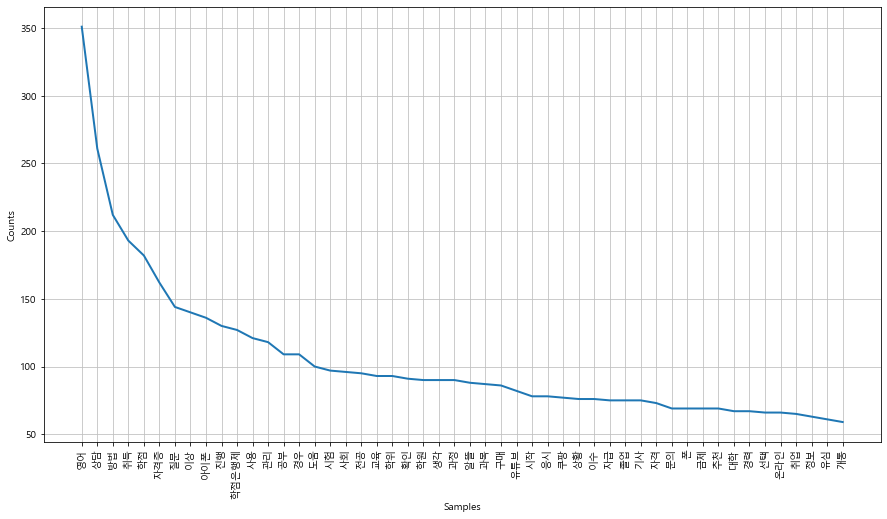

In [20]:
new_ko = nltk.Text(ko, name='유튜브')

plt.figure(figsize=(15, 8))
new_ko.plot(50)
plt.show()

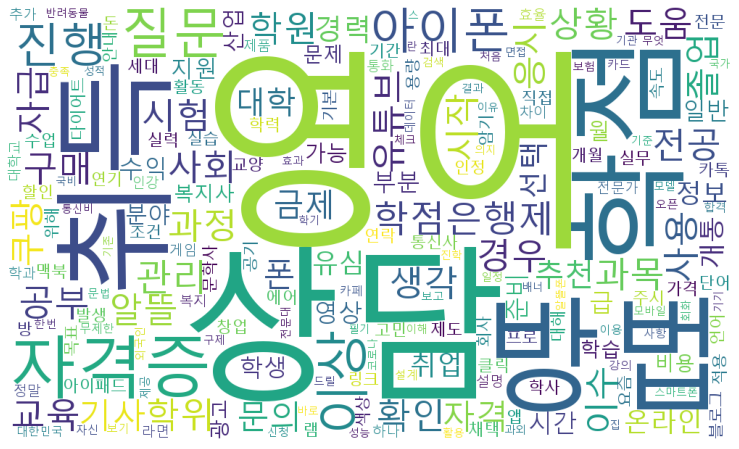

In [21]:
data = new_ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2,
                      background_color='white',
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

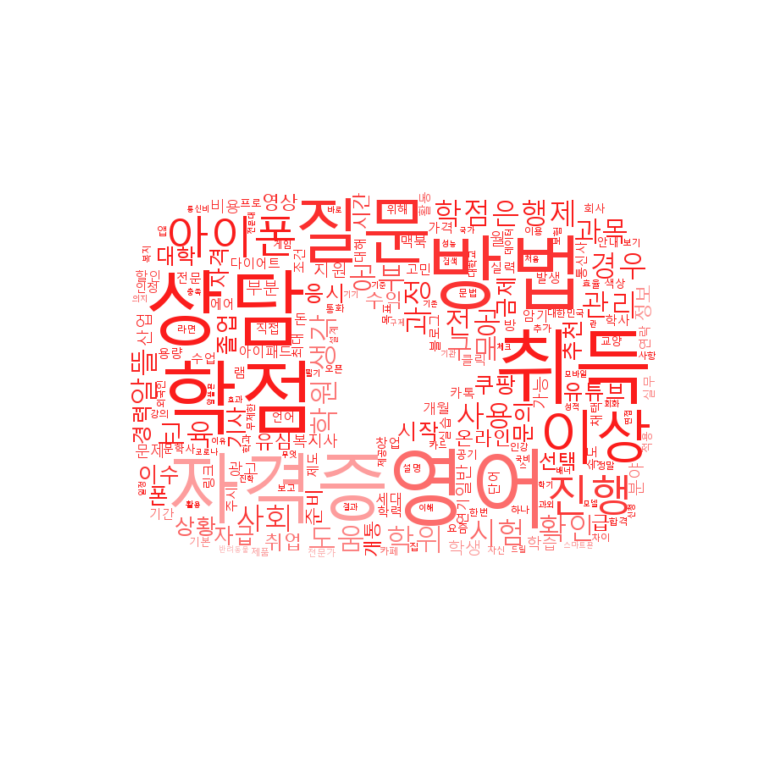

In [31]:
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('./data/youtube.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.1, mask=mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(14, 14))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()